<a href="https://colab.research.google.com/github/Aleena24/CV_lab/blob/main/lab2_Affine_transformation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
import cv2
import numpy as np

In [127]:
image = cv2.imread("/content/drive/MyDrive/research_dataset/BSD100/143090.png")

An affine transformation in computer vision refers to a linear mapping that preserves points, straight lines, and planes. It can include operations such as rotation, translation (shifting), scaling (resizing), and shearing (skewing).

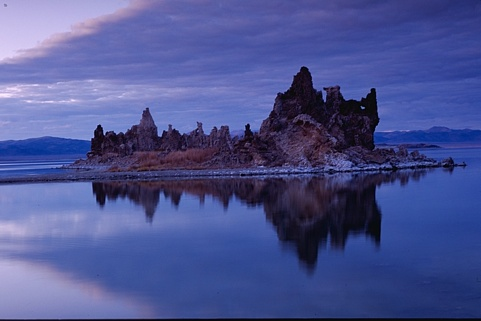

In [128]:
cv2_imshow(image)

# translation (shifting)

In [129]:
# Define translation matrix for shifting image
tx = 50
ty = 30
translation_matrix = np.float32([[1, 0, tx],
                                 [0, 1, ty]])

In [130]:
translated_image = cv2.warpAffine(image, translation_matrix, (image.shape[1], image.shape[0]))

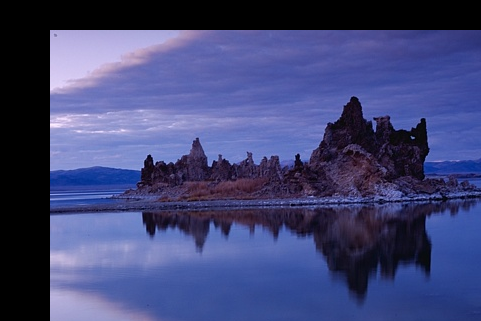

In [131]:
cv2_imshow(translated_image)


# Rotation

In [132]:
# Define rotation matrix for rotating image
angle = 90  # Angle in degrees
rotation_matrix = cv2.getRotationMatrix2D(center=(image.shape[1] / 2, image.shape[0] / 2), angle=angle, scale=1)


In [133]:
rotated_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))

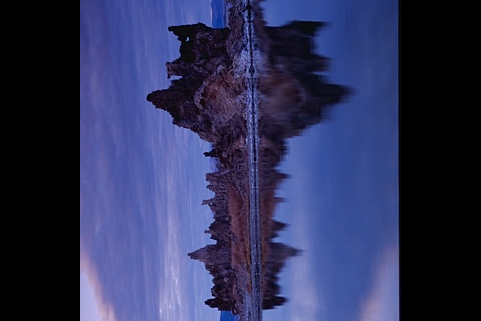

In [134]:
cv2_imshow(rotated_image)

# scaling (resizing)

In [135]:
# Define scaling matrix for scaling image
scale_factor_x = 1.5
scale_factor_y = 1.5
scaling_matrix = np.float32([[scale_factor_x, 0, 0],
                             [0, scale_factor_y, 0]])

In [136]:
scaled_image = cv2.warpAffine(image, scaling_matrix, (image.shape[1], image.shape[0]))


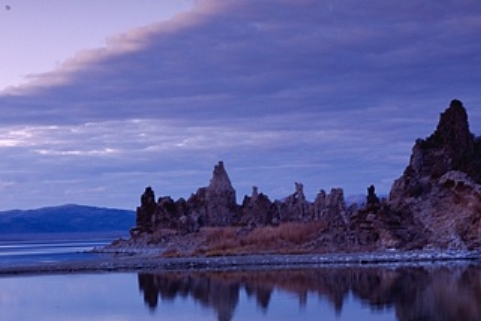

In [137]:
cv2_imshow(scaled_image)

# shearing (skewing)

In [138]:
# Define shearing matrix for shearing image
shx = 0.5
shy = 0.2
shearing_matrix = np.float32([[1, shx, 0],
                              [shy, 1, 0]])

In [139]:
sheared_image = cv2.warpAffine(image, shearing_matrix, (image.shape[1], image.shape[0]))


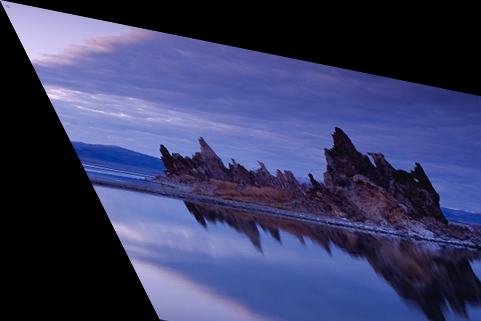

In [140]:
cv2_imshow(sheared_image)

# Scipy


In [141]:
import numpy as np
from scipy import ndimage as ndi
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

In [142]:
img = rgb2gray(imread("/content/drive/MyDrive/research_dataset/BSD100/143090.png"))
w, h = img.shape

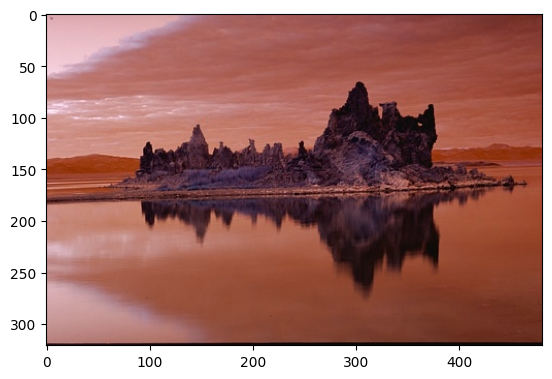

In [143]:
plt.imshow(image)

# Identity Transform

In [144]:
mat_identity = np.array([[1,0,0],[0,1,0],[0,0,1]])
img1 = ndi.affine_transform(img, mat_identity)

# Reflection Transform

In [145]:
mat_reflect = np.array([[1,0,0],[0,-1,0],[0,0,1]]) @ np.array([[1,0,0],[0,1,-h],[0,0,1]])
img2 = ndi.affine_transform(img, mat_reflect) # offset=(0,h)

# Scaling

In [146]:
s_x, s_y = 0.75, 0.75
mat_scale = np.array([[s_x,0,0],[0,s_y,0],[0,0,1]])
img3 = ndi.affine_transform(img, mat_scale)

# Rotation

In [147]:
theta = np.pi/6
mat_rotate = np.array([[1,0,w/2],[0,1,h/2],[0,0,1]]) @ np.array([[np.cos(theta),np.sin(theta),0],[np.sin(theta),-np.cos(theta),0],[0,0,1]]) @ np.array([[1,0,-w/2],[0,1,-h/2],[0,0,1]])
img4 = ndi.affine_transform(img1, mat_rotate)

# Shearing

In [148]:
lambda1 = 0.5
mat_shear = np.array([[1,lambda1,0],[lambda1,1,0],[0,0,1]])
img5 = ndi.affine_transform(img1, mat_shear)

# Translation (shifting)

In [149]:
tx,ty=50,50
mat_translate = np.array([[1,0,tx],[0,1,ty],[0,0,1]])
img6 = ndi.affine_transform(img, mat_translate) # offset=(0,h)

#concat all tranforms

In [150]:
mat_all = mat_identity @ mat_reflect @ mat_scale @ mat_rotate @ mat_shear
final=ndi.affine_transform(img, mat_all)

Text(0.5, 1.0, 'All transformation')

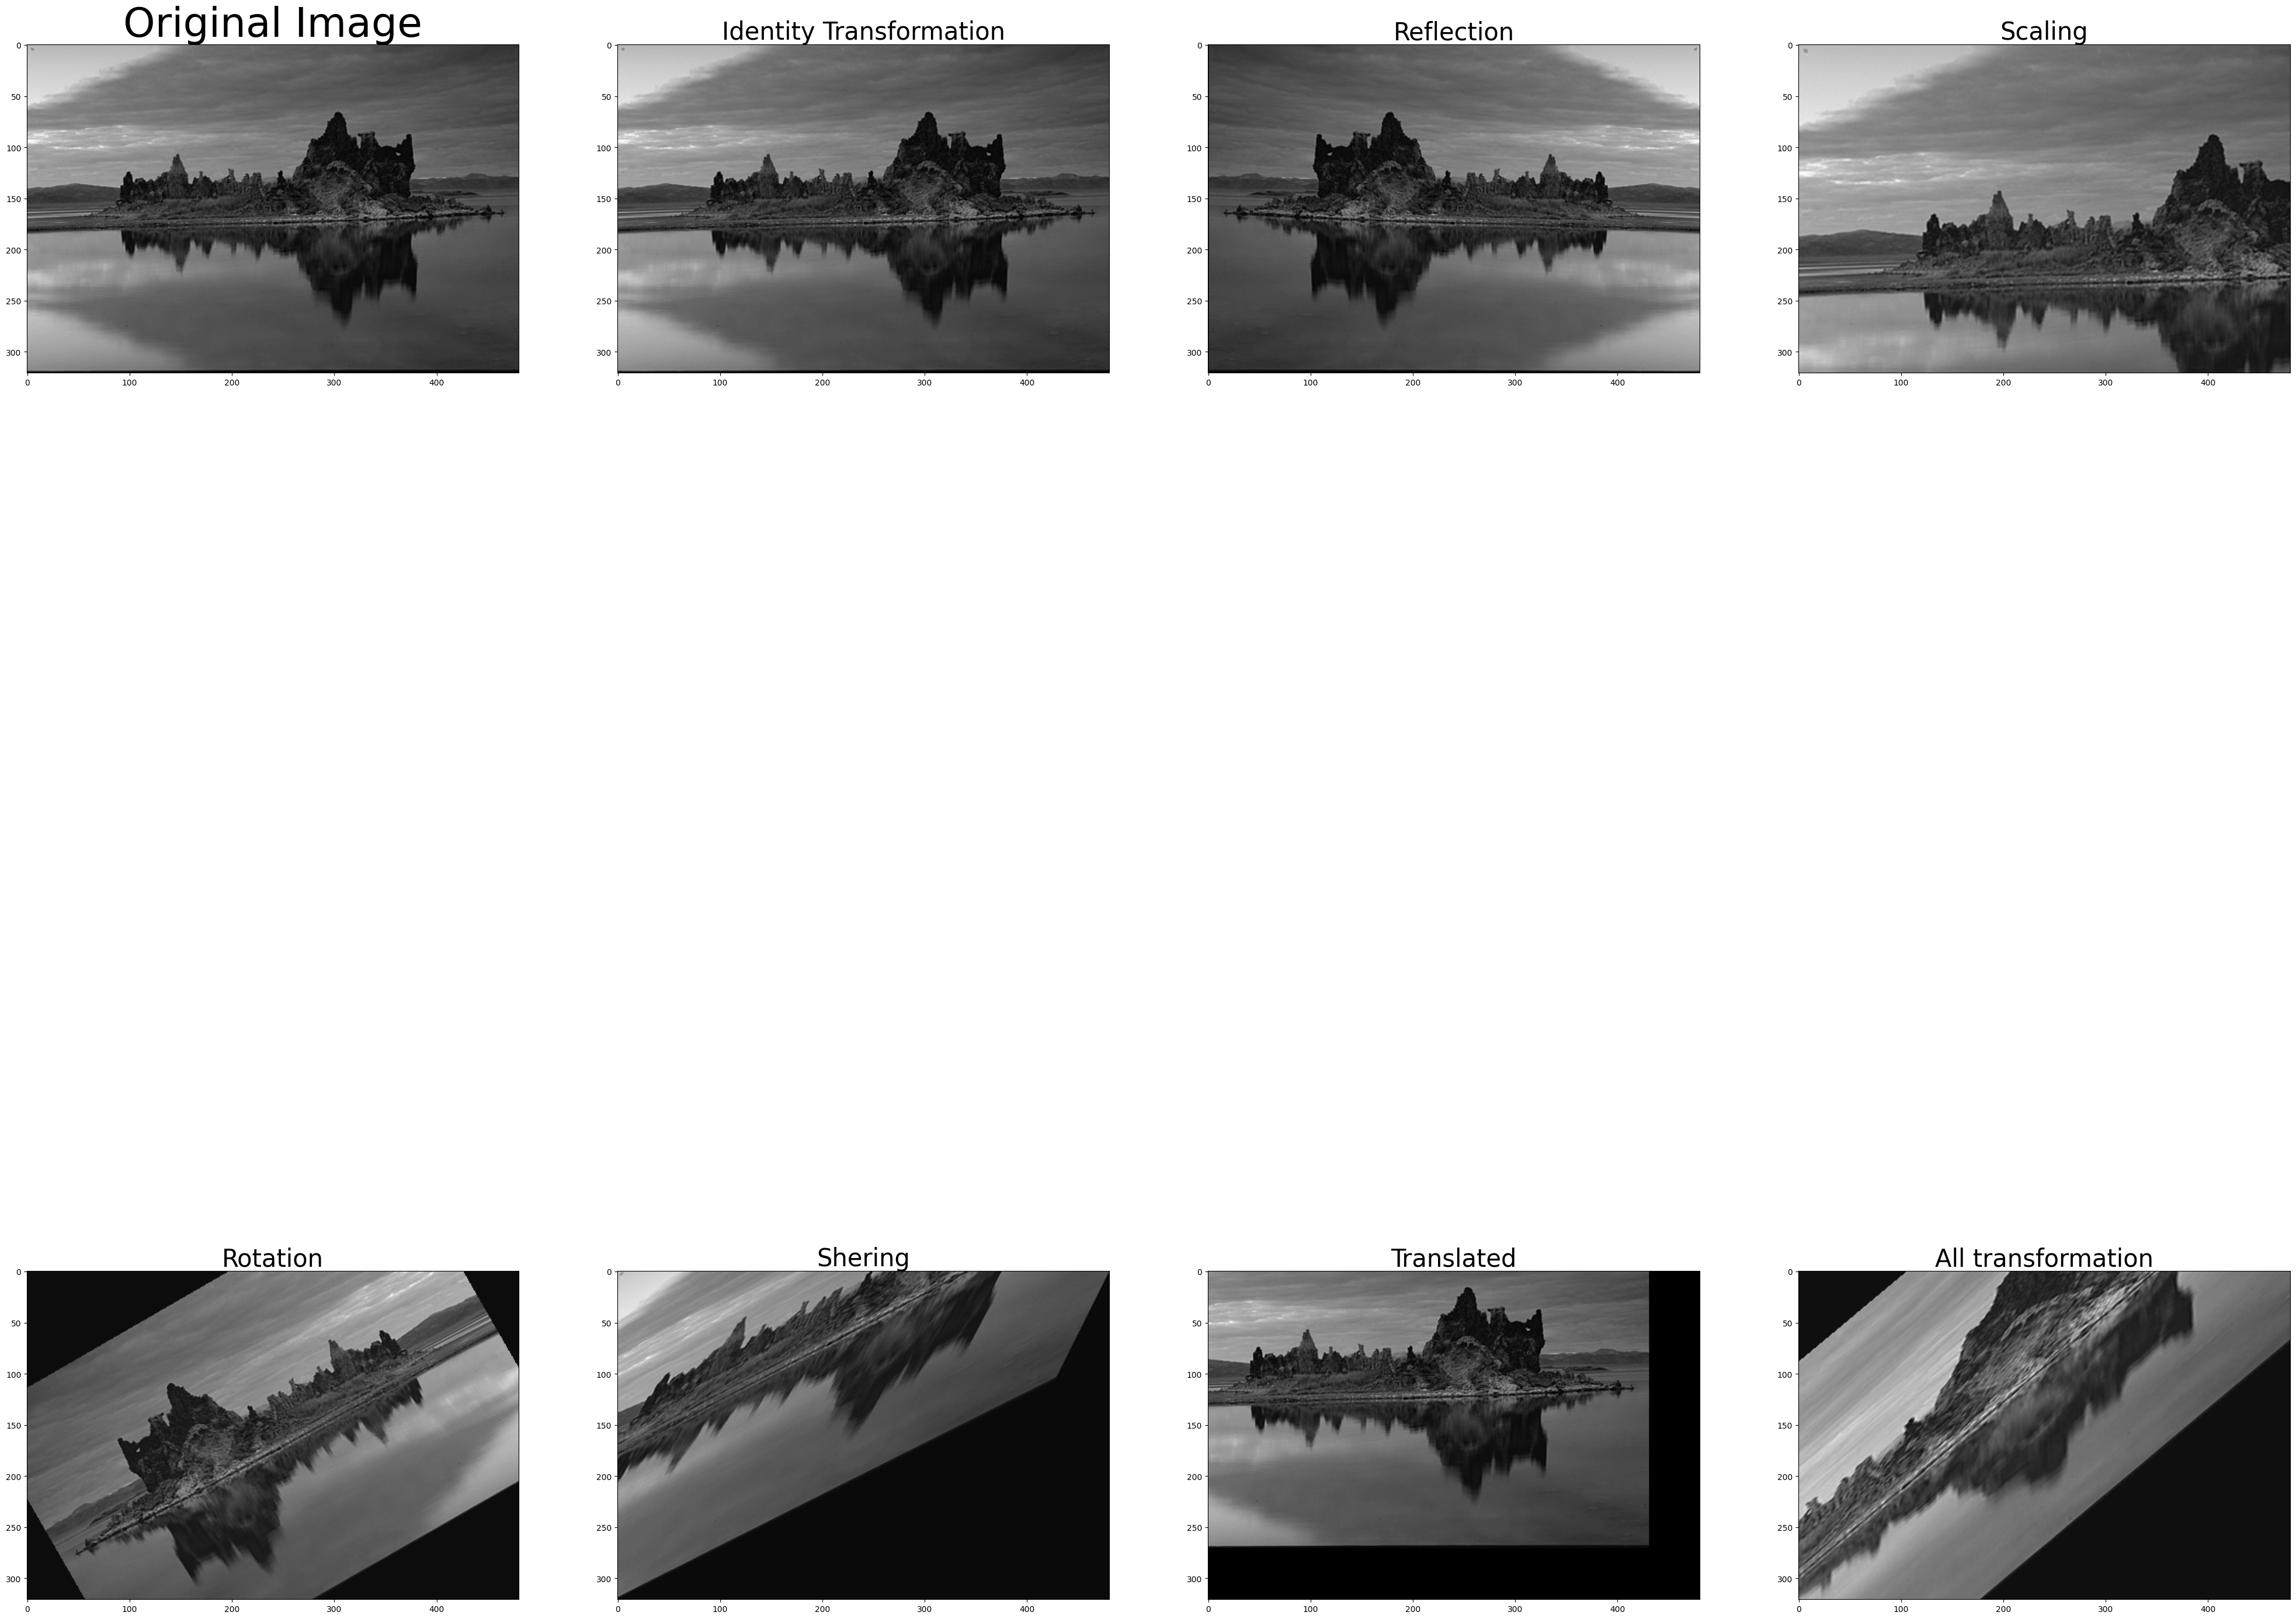

In [151]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(50, 50))
ax[0, 0].imshow(img,"gray")
ax[0, 0].set_title('Original Image',fontsize = 50)
ax[0, 1].imshow(img1,"gray")
ax[0, 1].set_title('Identity Transformation',fontsize = 30)
ax[0, 2].imshow(img2, "gray")
ax[0, 2].set_title('Reflection',fontsize = 30)
ax[0, 3].imshow(img3, "gray")
ax[0, 3].set_title('Scaling',fontsize = 30)
ax[1, 0].imshow(img4, "gray")
ax[1, 0].set_title('Rotation',fontsize = 30)
ax[1, 1].imshow(img5, "gray")
ax[1, 1].set_title('Shering',fontsize = 30)
ax[1, 2].imshow(img6,"gray")
ax[1, 2].set_title('Translated',fontsize = 30)
ax[1, 3].imshow(final, "gray")
ax[1, 3].set_title('All transformation',fontsize = 30)